# Suicide Rates Analysis - WHO Data
Author: Udara Lakshitha

## 🧾 Introduction

Mental health and suicide prevention are among the most critical public health challenges worldwide. This project explores suicide statistics compiled by the World Health Organization (WHO) across different countries, age groups, and genders from 1985 to 2016.

The goal is to analyze trends, identify patterns, and gain insights into how suicide rates vary over time and demographics. All visualizations are created using Python's Matplotlib library.

---

**Key Questions:**
- Which countries have the highest suicide rates?
- How do suicide rates vary by gender and age?
- What are the trends over time globally?

## Load & Clean the Data

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("who_suicide_statistics.csv")

print(df.shape)
df.head()

(43776, 6)


,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [2]:
# Check the missing values
print(df.isnull().sum())

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64


In [3]:
# I decided to drop columns including null values for data cleaning
df = df.dropna()

## Exploratory Data Analysis

In [4]:
# Total suicides by gender

print("------------------Total suicides by gender------------------")
print(df.groupby("sex")["suicides_no"].sum())

# Suicides by country (10 highest countries)
print("\n------------------Suicides by country (10 highest countries)------------------")
print(df.groupby("country")["suicides_no"].sum().sort_values(ascending = False).head(10))

# Suicides over the year
print("\n------------------Suicides over the year------------------")
print(df.groupby("year")["suicides_no"].sum())

------------------Total suicides by gender------------------
sex
female    1894294.0
male      6104173.0
Name: suicides_no, dtype: float64

------------------Suicides by country (10 highest countries)------------------
country
Russian Federation          1500992.0
United States of America    1201401.0
Japan                        937614.0
France                       395500.0
Ukraine                      365170.0
Germany                      291262.0
Republic of Korea            261730.0
Brazil                       250824.0
Poland                       172562.0
United Kingdom               166314.0
Name: suicides_no, dtype: float64

------------------Suicides over the year------------------
year
1979     92790.0
1980    153400.0
1981    177705.0
1982    182435.0
1983    122166.0
1984    124264.0
1985    197115.0
1986    188684.0
1987    185757.0
1988    180726.0
1989    185356.0
1990    204043.0
1991    204236.0
1992    218446.0
1993    228951.0
1994    239869.0
1995    245203.0
1996 

## Visualizations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

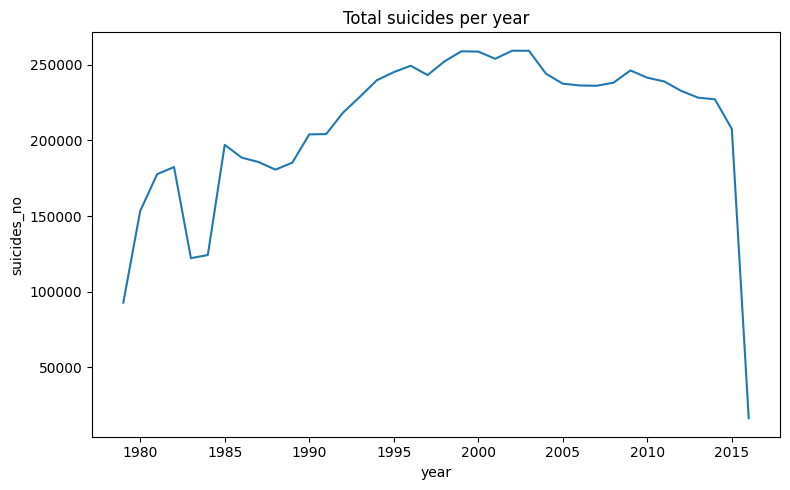

In [6]:
# Trend over time

yearly_data = df.groupby("year")["suicides_no"].sum().reset_index()
plt.figure(figsize = (8, 5))
sns.lineplot(data = yearly_data, x = "year", y = "suicides_no")
plt.title("Total suicides per year")
plt.tight_layout()
plt.show()

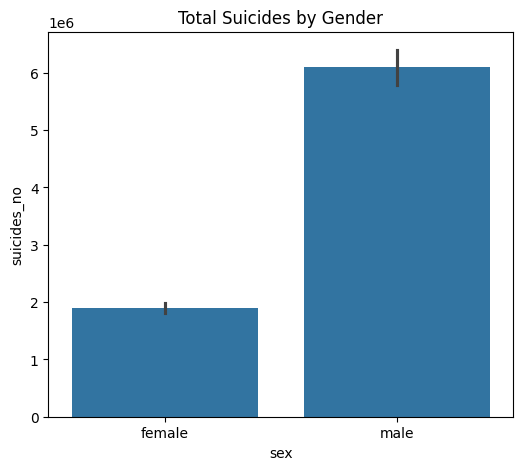

In [7]:
# Total suicides per gender

plt.figure(figsize = (6, 5))
sns.barplot(data = df, x = "sex", y = "suicides_no", estimator = sum)
plt.title("Total Suicides by Gender")
plt.show()

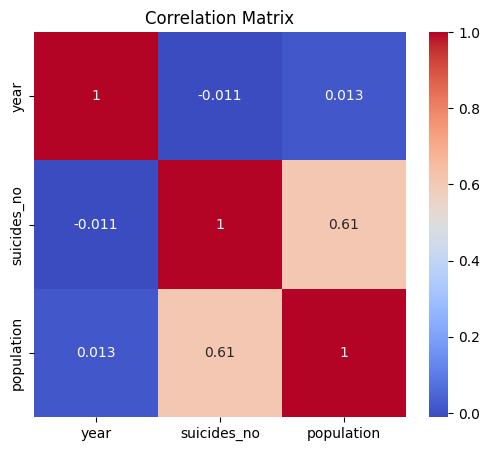

In [8]:
# Correlation Matrix

plt.figure(figsize = (6, 5))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 🔍 Key Insights:
- Male suicide rates are significantly higher.
- Suicides peaked in 2002.
- Russian Federation had the highest suicide rate over the dataset period.